# Building the model

### Import required packages

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

/home/techno/DataScienceProjects/kaggle-titanic/venv/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Load dataset into memory

In [3]:
dataset = load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.Series(dataset.target, name='target')

### Divide into training and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

### Principal Component Analysis

Text(0.5,1,'First two principal components of dataset')

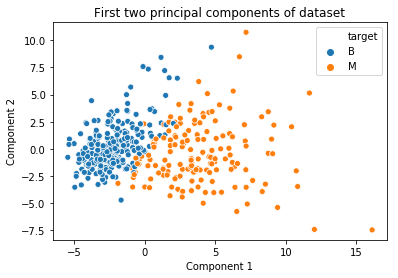

In [5]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])
X_pca = pipe.fit_transform(X_train, y_train)
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y_train.map({0:'M', 1:'B'}))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('First two principal components of dataset')

### Trying out different base models

#### K-Nearest Neighbors

In [6]:
%%time
knn_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]+1),
    'knn__n_neighbors': np.arange(1, X_train.shape[1], 2)
}
knn_model = GridSearchCV(knn_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
knn_model.fit(X_train, y_train)
print('Best params: {}'.format(knn_model.best_params_))
print('Training Score: {}'.format(knn_model.score(X_train, y_train)))
print('CV Score: {}'.format(knn_model.best_score_))
print('Test Score: {}'.format(knn_model.score(X_test, y_test)))

Fitting 3 folds for each of 450 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    5.3s


Best params: {'knn__n_neighbors': 9, 'pca__n_components': 7}
Training Score: 0.9694835680751174
CV Score: 0.9694835680751174
Test Score: 0.951048951048951
CPU times: user 2.76 s, sys: 89.5 ms, total: 2.85 s
Wall time: 27 s


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   26.8s finished


#### Gaussian Naive Bayes

In [7]:
%%time
gnb_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('gnb', GaussianNB())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]+1)
}
gnb_model = GridSearchCV(gnb_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
gnb_model.fit(X_train, y_train)
print('Best params: {}'.format(gnb_model.best_params_))
print('Training Score: {}'.format(gnb_model.score(X_train, y_train)))
print('CV Score: {}'.format(gnb_model.best_score_))
print('Test Score: {}'.format(gnb_model.score(X_test, y_test)))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'pca__n_components': 7}
Training Score: 0.9295774647887324
CV Score: 0.9248826291079812
Test Score: 0.916083916083916
CPU times: user 281 ms, sys: 222 ms, total: 503 ms
Wall time: 1.16 s


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.0s finished


#### Logistic Regression

In [8]:
%%time
lgr_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lgr', LogisticRegression())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]//3),
    'lgr__C': np.logspace(0, 1, 10)
}
lgr_model = GridSearchCV(lgr_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
lgr_model.fit(X_train, y_train)
print('Best params: {}'.format(lgr_model.best_params_))
print('Training Score: {}'.format(lgr_model.score(X_train, y_train)))
print('CV Score: {}'.format(lgr_model.best_score_))
print('Test Score: {}'.format(lgr_model.score(X_test, y_test)))

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    2.6s


Best params: {'lgr__C': 1.6681005372000588, 'pca__n_components': 8}
Training Score: 0.9882629107981221
CV Score: 0.9859154929577465
Test Score: 0.965034965034965
CPU times: user 813 ms, sys: 252 ms, total: 1.06 s
Wall time: 3.36 s


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    3.2s finished


#### Random Forest

In [9]:
%%time
rdf_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rdf', RandomForestClassifier())
])
param_grid = {
    'rdf__n_estimators': np.arange(200, 1001, 200),
    'rdf__max_depth': np.arange(1,4),
}
rdf_model = GridSearchCV(rdf_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
rdf_model.fit(X_train, y_train)
print('Best params: {}'.format(rdf_model.best_params_))
print('Training Score: {}'.format(rdf_model.score(X_train, y_train)))
print('CV Score: {}'.format(rdf_model.best_score_))
print('Test Score: {}'.format(rdf_model.score(X_test, y_test)))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   23.7s finished


Best params: {'rdf__max_depth': 3, 'rdf__n_estimators': 200}
Training Score: 0.9835680751173709
CV Score: 0.9553990610328639
Test Score: 0.9370629370629371
CPU times: user 695 ms, sys: 202 ms, total: 897 ms
Wall time: 24.3 s


#### Support Vector Classifier

In [10]:
%%time
svc_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]//3),
    'svc__C': np.logspace(0, 3, 10),
    'svc__kernel': ['rbf'],
    'svc__gamma': np.logspace(-4, -3, 10)
}
svc_model = GridSearchCV(svc_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
svc_model.fit(X_train, y_train)
print('Best params: {}'.format(svc_model.best_params_))
print('Training Score: {}'.format(svc_model.score(X_train, y_train)))
print('CV Score: {}'.format(svc_model.best_score_))
print('Test Score: {}'.format(svc_model.score(X_test, y_test)))

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:   27.8s


Best params: {'pca__n_components': 8, 'svc__C': 215.44346900318823, 'svc__gamma': 0.00046415888336127773, 'svc__kernel': 'rbf'}
Training Score: 0.9882629107981221
CV Score: 0.9882629107981221
Test Score: 0.972027972027972
CPU times: user 6.72 s, sys: 184 ms, total: 6.9 s
Wall time: 42.9 s


[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   42.8s finished


#### XGBoost

In [15]:
%%time
xgb_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
#     ('pca', PCA()),
    ('xgb', XGBClassifier())
])
param_grid = {
#     'pca__n_components': np.arange(1, X_train.shape[1]//3),
    'xgb__n_estimators': [100],
    'xgb__learning_rate': np.logspace(-3, 0, 10),
    'xgb__max_depth': np.arange(1, 6),
    'xgb__gamma': np.arange(0, 1.0, 0.1),
    'xgb__reg_lambda': np.logspace(-3, 3, 10)
}
xgb_model = GridSearchCV(xgb_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
xgb_model.fit(X_train, y_train)
print('Best params: {}'.format(xgb_model.best_params_))
print('Training Score: {}'.format(xgb_model.score(X_train, y_train)))
print('CV Score: {}'.format(xgb_model.best_score_))
print('Test Score: {}'.format(xgb_model.score(X_test, y_test)))

Fitting 3 folds for each of 5000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 7144 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 9744 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 12744 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 15000 out of 15000 | elapsed:  7.3min finished


Best params: {'xgb__gamma': 0.1, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__reg_lambda': 0.021544346900318832}
Training Score: 1.0
CV Score: 0.960093896713615
Test Score: 0.958041958041958
CPU times: user 37.6 s, sys: 723 ms, total: 38.3 s
Wall time: 7min 16s


### Stacking together best models

In [16]:
%%time
models = {
    'KNN': knn_model,
    'GaussianNB': gnb_model,
    'LogisticRegression': lgr_model,
    'RandomForests': rdf_model,
    'SVC': svc_model,
    'XGBoost': xgb_model
}
y_stacked = pd.DataFrame({model_name: model.predict(X_train) for model_name, model in models.items()})
y_stacked_train, y_stacked_test, y_train_train, y_train_test = train_test_split(y_stacked, y_train, 
                                                                              random_state=0, stratify=y_train)
param_grid = {
    'C': np.logspace(0, 3, 10),
    'kernel': ['rbf'],
    'gamma': np.logspace(-3, 3, 10)
}
stacked_model = GridSearchCV(SVC(), param_grid=param_grid, verbose=1, n_jobs=-1)
stacked_model.fit(y_stacked_train, y_train_train)
print('Best params: {}'.format(stacked_model.best_params_))
print('Training Score: {}'.format(stacked_model.score(y_stacked_train, y_train_train)))
print('CV Score: {}'.format(stacked_model.best_score_))
print('Test Score: {}'.format(stacked_model.score(y_stacked_test, y_train_test)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best params: {'C': 1.0, 'gamma': 0.004641588833612777, 'kernel': 'rbf'}
Training Score: 0.9905956112852664
CV Score: 0.9905956112852664
Test Score: 0.9813084112149533
CPU times: user 419 ms, sys: 37.2 ms, total: 456 ms
Wall time: 777 ms


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished


### Evaluating the model

In [17]:
y_stacked = pd.DataFrame({model_name: model.predict(X_test) for model_name, model in models.items()})
y_pred = stacked_model.predict(y_stacked)
print('Overall Accuracy Score: {:.2%}'.format(accuracy_score(y_test, y_pred)))
print('Classification report:')
print(classification_report(y_test, y_pred))

Overall Accuracy Score: 96.50%
Classification report:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95        53
          1       0.97      0.98      0.97        90

avg / total       0.96      0.97      0.96       143

